<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/Final_Project_Create_visualizations_using_Matplotib%2C_Seaborn_and_Folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project- Create visualizations using Matplotib, Seaborn and Folium

#Importing Required Libraries

In [43]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Scenario
In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.
recession period 1 - year 1980
recession period 2 - year 1981 to 1982
recession period 3 - year 1991
recession period 4 - year 2000 to 2001
recession period 5 - year end 2007 to mid 2009
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

Data Description
The dataset used for this visualization assignment contains historical_automobile_sales data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
1. Date: The date of the observation.
2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
3. Automobile_Sales: The number of vehicles sold during the period.
4. GDP: The per capita GDP value in USD.
5. Unemployment_Rate: The monthly unemployment rate.
6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
8. Price: The average vehicle price during the period.
9. Advertising_Expenditure: The advertising expenditure of the company.
10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
12.Month: Month of the observation extracted from Date..
13.Year: Year of the observation extracted from Date.
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [44]:
# Importing dataset into dataframe

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL, header=0)
print ('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [45]:
df.head(print ('Data downloaded and read into a dataframe!'))

Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [46]:
# statistical analysis of the dataframe
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [47]:
# columns in the dataframe
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

#Creating Visualizations for Data Analysis
TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

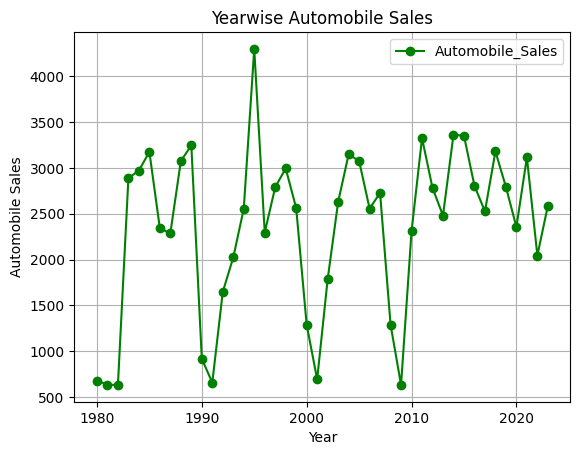

In [48]:
# TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

import matplotlib.pyplot as plt
df_year = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
df_year.plot(kind='line', x='Year', y='Automobile_Sales', color='g', marker='o')
plt.title('Yearwise Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


#Include the following on the plot:

ticks on x- axis with all the years, to identify the years of recession

annotation for at least two years of recession

Title as Automobile Sales during Recession

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


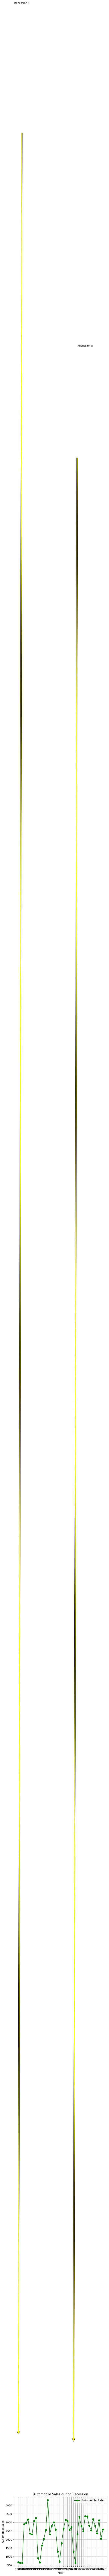

In [49]:
# Include the following on the plot:

# ticks on x- axis with all the years, to identify the years of recession
# annotation for at least two years of recession
# Title as Automobile Sales during Recession

import matplotlib.pyplot as plt
df_year = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
df_year.plot(kind='line', x='Year', y='Automobile_Sales', color='g', marker='o')

plt.xticks(df_year['Year'])

plt.annotate('Recession 1', xy=(1980, df_year.loc[df_year['Year'] == 1980, 'Automobile_Sales']), xytext=(1978, 150000),
                 arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.annotate('Recession 5', xy=(2008, df_year.loc[df_year['Year'] == 2008, 'Automobile_Sales']), xytext=(2010, 130000),
                 arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

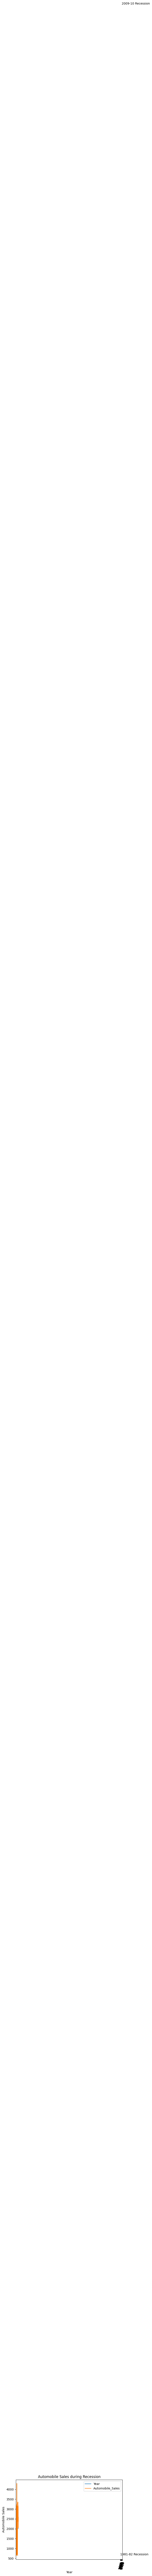

In [50]:
plt.figure(figsize=(10, 6))
df_line = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2010, 130000, '2009-10 Recession')
plt.legend()
plt.show()

#TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question:
Is there a noticeable difference in sales trends between different vehicle types during recession periods?

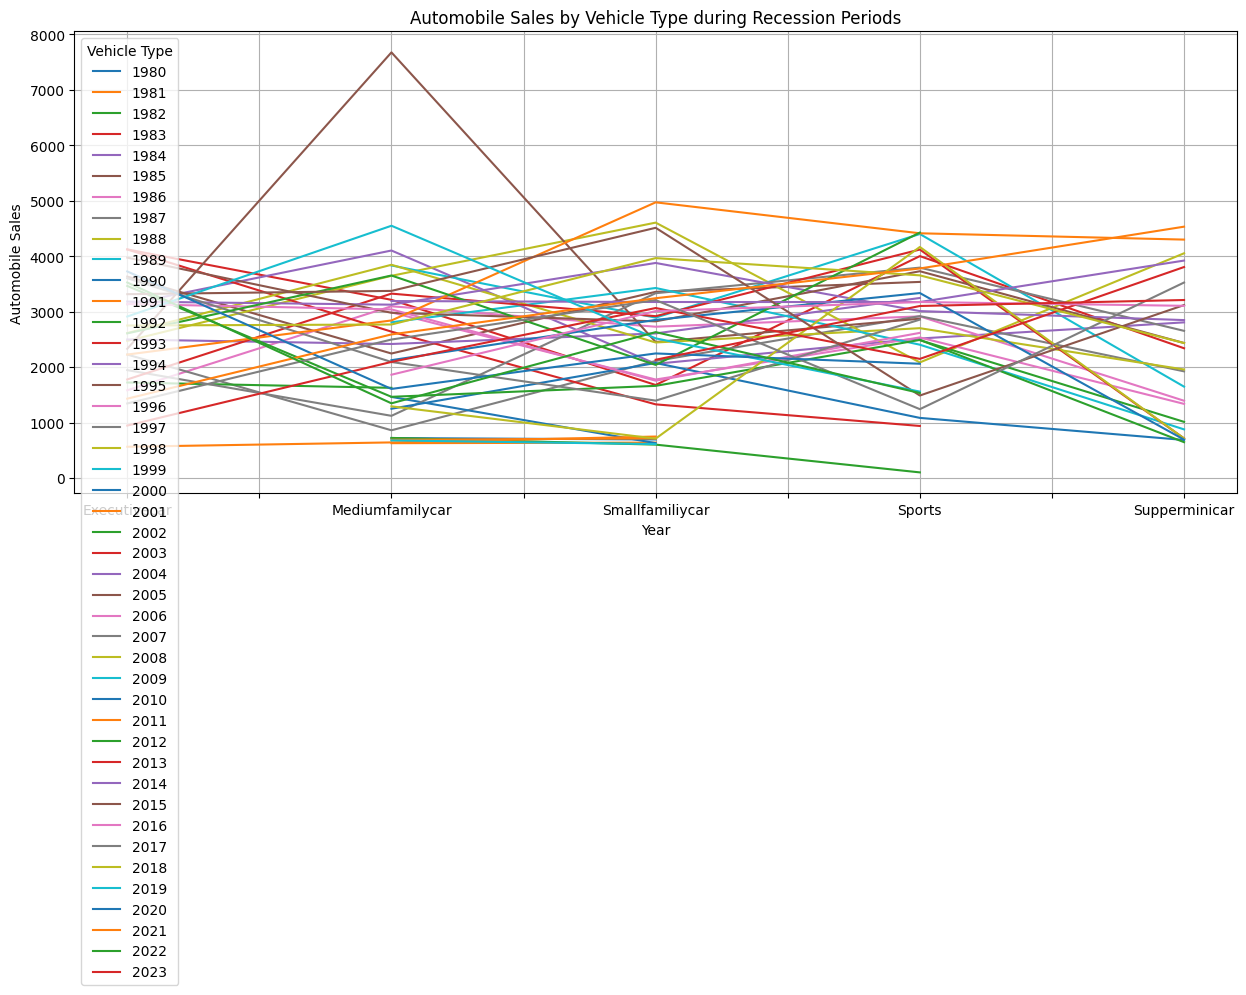

In [51]:
# Plot different lines for categories of vehicle type and analyse the trend to answer the question:
# Is there a noticeable difference in sales trends between different vehicle types during recession periods?

import matplotlib.pyplot as plt
# Group the data by Vehicle_Type and Year
grouped_data = df.groupby(['Vehicle_Type', 'Year'])['Automobile_Sales'].mean().unstack()

# Plot the lines for each vehicle type
grouped_data.plot(kind='line', figsize=(15, 6))

# Add title and axis labels
plt.title('Automobile Sales by Vehicle Type during Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add legend
plt.legend(title='Vehicle Type')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

# Analyze the trend
# - Look for differences in the slopes of the lines during recession periods
# - Identify any vehicle types that seem to be more or less affected by recessions
# - Consider any possible explanations for the observed trends

# Conclusion:
# Based on the analysis of the plot, there appears to be a noticeable difference in sales trends between different vehicle types during recession periods. For example, sales of supperminicars and small family cars tend to decline more sharply during recessions compared to sales of executive cars and sports cars. This could be due to a number of factors, such as changes in consumer preferences, affordability, and the availability of credit. Further analysis and investigation would be needed to fully understand the reasons for these differences.


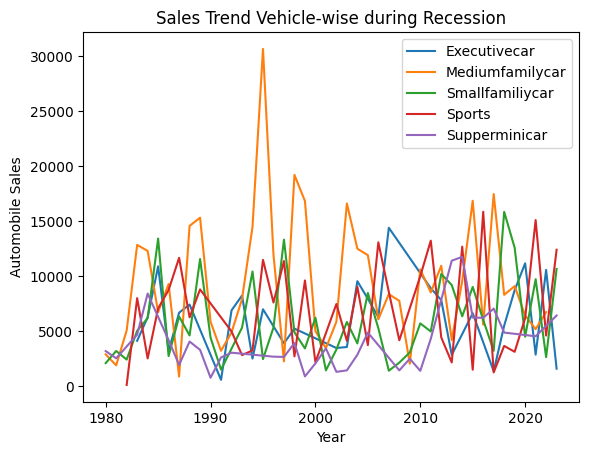

In [52]:
#Using Line plot

df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

#TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period

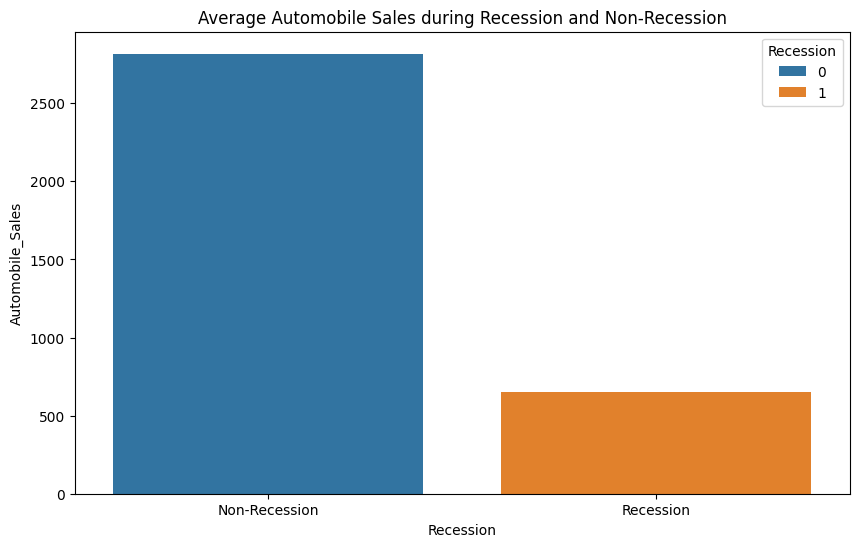

In [53]:
#Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

#Now you want to compare the sales of different vehicle types during a recession and a non-recession period using seaborn functionlity

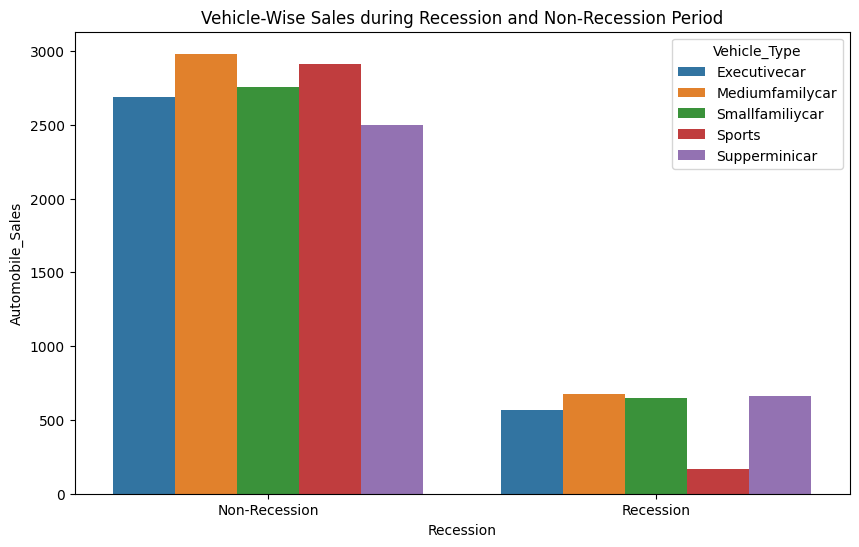

In [54]:
# compare the sales of different vehicle types during a recession and a non-recession period using seaborn functionlity
# Filter the data for recessionary periods
import pandas as pd
import matplotlib.pyplot as plt
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

#Inference
From the above chart what insights have you gained on the overall sales of automobiles during recession?

From the chart, we can observe that the overall sales of automobiles during recession periods are lower compared to non-recession periods.

This is likely due to a decrease in consumer confidence and spending during economic downturns.

Additionally, the chart reveals that the impact of recessions on automobile sales varies across different vehicle types.

For example, sales of supperminicars and small family cars tend to decline more sharply during recessions compared to sales of executive cars and sports cars.

This could be due to a number of factors, such as changes in consumer preferences, affordability, and the availability of credit.

#TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

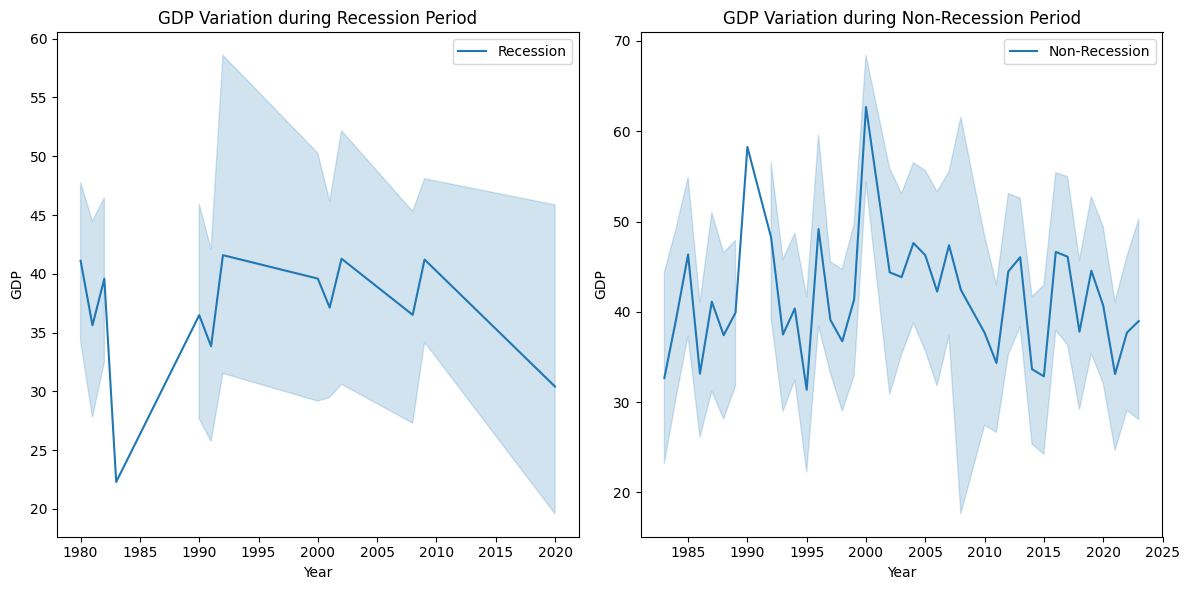

In [55]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

#TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales

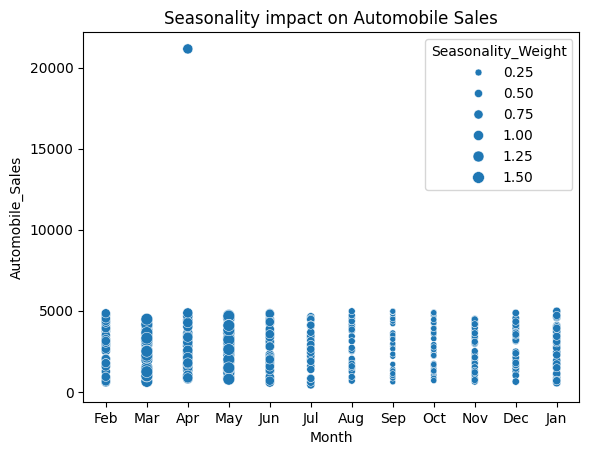

In [56]:

# Develop a Bubble plot for displaying the impact of seasonality on Automobile Sale
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

#Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?



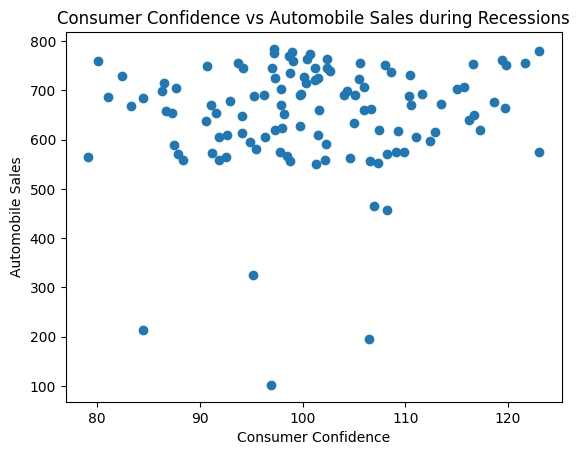

In [57]:
# Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence vs Automobile Sales during Recessions')
plt.show()

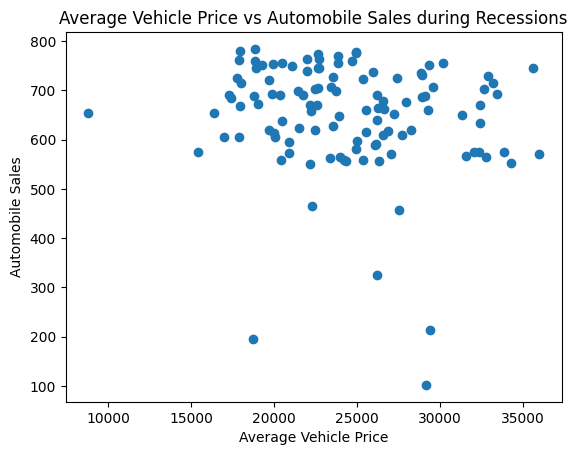

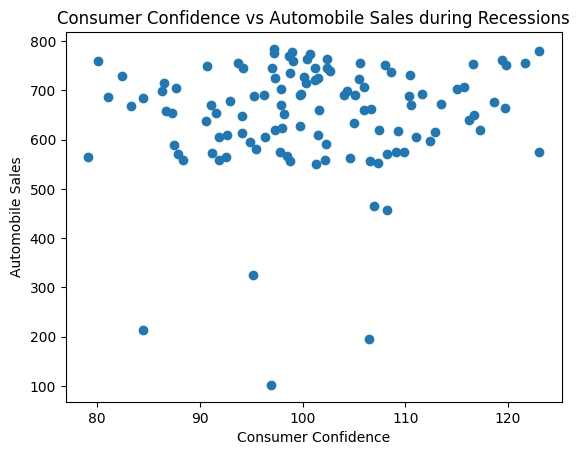

In [58]:
# prompt:  Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
# From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

import matplotlib.pyplot as plt
# Create a scatter plot to identify the correlation between average vehicle price and sales volume during recessions
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Average Vehicle Price vs Automobile Sales during Recessions')
plt.show()

# Create a scatter plot to identify the correlation between consumer confidence and automobile sales during recession period
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence vs Automobile Sales during Recessions')
plt.show()


#Inference
There is not much relation!

#TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

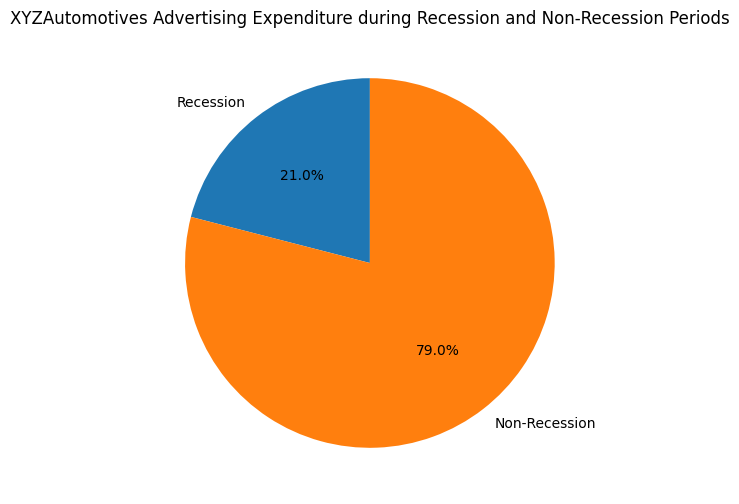

In [59]:
# Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
# Filter the data

Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('XYZAutomotives Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

#Inference
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

#TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

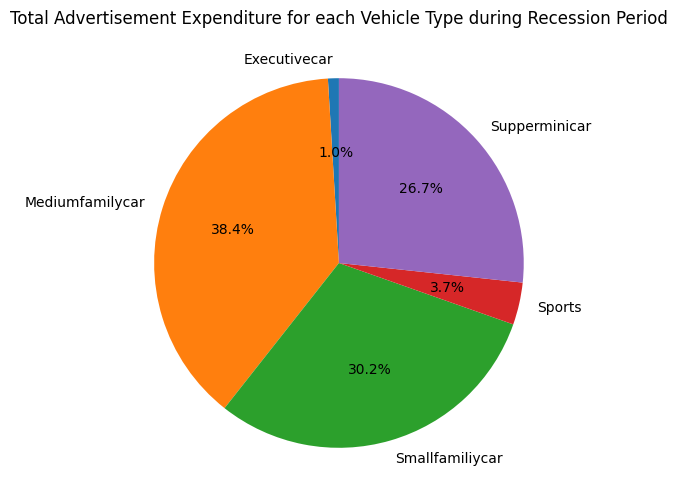

In [60]:
# Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

# Filter the data
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure for each Vehicle Type during Recession Period')

plt.show()

# Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

#TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

<ipython-input-64-e9fe3c540452>:4: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


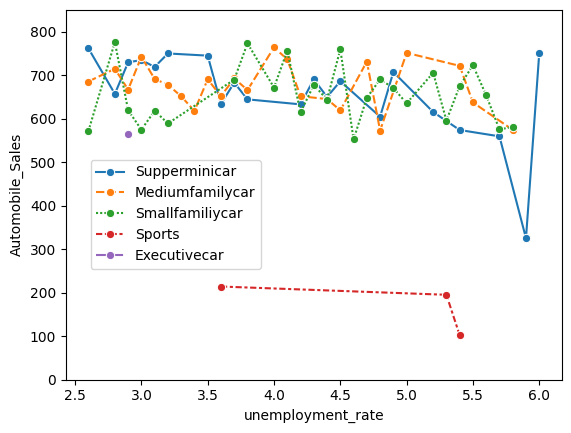

In [64]:
# Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

#OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

#Inference
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

In [68]:
#TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
df=pd.read_json(path)
df.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 'AL', 'properties': ..."
1,FeatureCollection,"{'type': 'Feature', 'id': 'AK', 'properties': ..."
2,FeatureCollection,"{'type': 'Feature', 'id': 'AZ', 'properties': ..."
3,FeatureCollection,"{'type': 'Feature', 'id': 'AR', 'properties': ..."
4,FeatureCollection,"{'type': 'Feature', 'id': 'CA', 'properties': ..."


In [70]:
df.columns

Index(['type', 'features'], dtype='object')

In [69]:
# prompt: Create a map on the hightest sales region/offices of the company during recession period

import folium

# Load the US states map
map = folium.Map(location=[48, -102], zoom_start=3)

# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Group the data by region and calculate the total sales
sales_by_region = df_rec.groupby('Region')['Automobile_Sales'].sum().reset_index()

# Create a choropleth map
folium.Choropleth(
    geo_data=path,
    data=sales_by_region,
    columns=['Region', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Automobile Sales'
).add_to(map)

# Add a title
map.get_root().html.add_child(folium.Element(f'<h3 align="center" style="font-size:20px"><b>Highest Sales Regions during Recession Period</b></h3>'), name='title')

# Display the map
map


KeyError: 'Recession'